# Loading Data

In [2]:
import pandas as pd
import numpy as np

In [8]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("spam.csv",encoding = 'latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# Remove the unnecessary columns for dataset and rename the column names.

In [12]:
df = df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.columns = ["label", "message"]

In [13]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Exploratory Data Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
df.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [17]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# Count the frequency of top 5 messages.
df['message'].value_counts().rename_axis(['message']).reset_index(name='counts').head()

,message,counts
0,"Sorry, I'll call later",30
1,I cant pick the phone right now. Pls send a me...,12
2,Ok...,10
3,7 wonders in My WORLD 7th You 6th Ur style 5th...,4
4,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",4


# Data Visualization

Text(0, 0.5, 'Frequency')

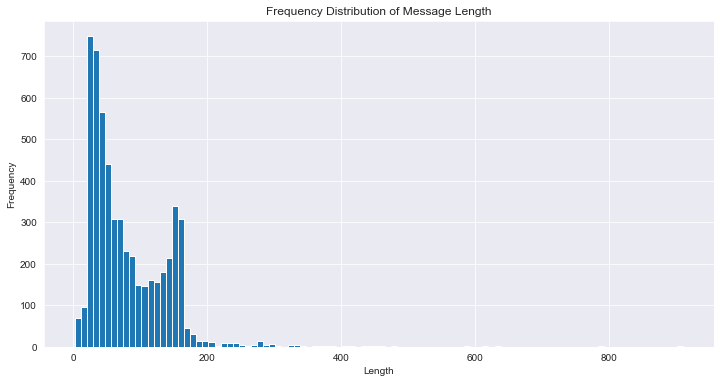

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

plt.figure(figsize=(12,6))
df['length'].plot(bins=100, kind='hist') # with 100 length bins (100 length intervals) 
plt.title("Frequency Distribution of Message Length")
plt.xlabel("Length")
plt.ylabel("Frequency")

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

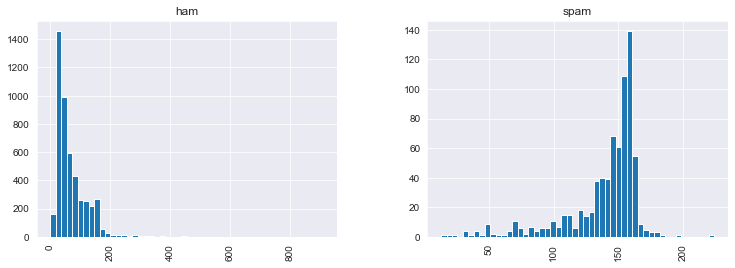

In [22]:
df.hist(column='length', by='label', bins=50,figsize=(12,4))

# Text Pre-processing

Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text

In [23]:
def text_preprocess(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()
    
    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    
    return nostop

In [25]:
spam_messages = df[df["label"] == "spam"]["message"]
ham_messages = df[df["label"] == "ham"]["message"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  747
No of ham messages :  4825


# Wordcloud for Spam Messages

In [28]:
!pip install wordcloud

In [29]:
import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [30]:
# This may take a while....
spam_words = text_preprocess(spam_messages)

In [31]:
df[df['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [33]:
# lets print some spam words
spam_words[:10]

['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may']

In [37]:
print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))

Top 10 Spam words are :

call      331
free      146
txt       136
ur        129
mobile    108
text      107
claim     105
u          98
reply      98
stop       78
dtype: int64


# Data Transformation

In [39]:
# This might take a while....

# Lets remove punctuations/ stopwords from all SMS 
df["message"] = df["message"].apply(text_preprocess)

In [40]:
# Conver the SMS into string from list
df["message"] = df["message"].agg(lambda x: ' '.join(map(str, x)))

In [41]:
df.head()

,label,message,length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts may...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think goes usf lives around though,61


In [42]:
df["message"][7]

'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune'

# Continuing Normalization

There are a lot of ways to continue normalizing the text. Such as Stemming or distinguishing by part of speech.

NLTK has lots of built-in tools. However sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
'Nah dawg, IDK! Wut time u headin to da club?'

versus

'No dog, I don't know! What time are you heading to the club?'

Some text normalization methods will have trouble with this type of shorthand and so we are not going to use them here. For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

# Vectorization

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of these messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

Count how many times does a word occur in each message (Known as term frequency or TF)

Weigh the counts, so that frequent tokens get lower weight (inverse document frequency or IDF)

Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus. We will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.

Countvectorizer counts the number of times a token shows up in the messages and uses this value as its weight.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message.

Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a Sparse Matrix.

# Creating the Bag of Words

In [46]:
#Creating the Bag of Words

# Note the here we are passing already process messages (after removing punctuations and stopwords)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow_transformer = vectorizer.fit(df['message'])

print("20 Bag of Words (BOW) Features: \n")
print(vectorizer.get_feature_names_out()[20:40])
print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))

20 Bag of Words (BOW) Features: 

['absence' 'absolutely' 'abstract' 'abt' 'abta' 'aburo' 'abuse' 'abusers'
 'ac' 'academic' 'acc' 'accent' 'accenture' 'accept' 'access' 'accessible'
 'accidant' 'accident' 'accidentally' 'accommodation']

Total number of vocab words :  8084


In [47]:
message4 = df['message'][3]
print(message4)

u dun say early hor u c already say


In [48]:
# fit_transform : Learn the vocabulary dictionary and return term-document matrix.
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 207)	1
  (0, 1981)	1
  (0, 2000)	1
  (0, 3141)	1
  (0, 5945)	2
(1, 8084)


In [50]:
feature_names = vectorizer.get_feature_names_out()

In [51]:
messages_bow = bow_transformer.transform(df['message'])

In [52]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 8084)
Amount of Non-Zero occurences:  44211


In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [54]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 5945)	0.6206136295983186
  (0, 3141)	0.5139528069861297
  (0, 2000)	0.37127907512470754
  (0, 1981)	0.3420160440299522
  (0, 207)	0.3096257562744466


In [57]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['say']])

5.14835197309133


# To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [58]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 8084)


In [59]:
df["message"][:10]

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts may...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
5    freemsg hey darling weeks word back id like fu...
6       even brother like speak treat like aids patent
7    per request melle melle oru minnaminunginte nu...
8    winner valued network customer selected receiv...
9    mobile months u r entitled update latest colou...
Name: message, dtype: object

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(df["message"])
print(features.shape)

print(len(vec.vocabulary_))

(5572, 7927)
7927


# Train Test Split

In [63]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages_tfidf, df['label'], test_size=0.2)

In [64]:
print("train dataset features size : ",msg_train.shape)
print("train dataset label size", label_train.shape)

print("\n")

print("test dataset features size", msg_test.shape)
print("test dataset lable size", label_test.shape)

train dataset features size :  (4457, 8084)
train dataset label size (4457,)


test dataset features size (1115, 8084)
test dataset lable size (1115,)


# Building Naive Bayes classifier Model

In [65]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
spam_detect_model = clf.fit(msg_train, label_train)

In [66]:
predict_train = spam_detect_model.predict(msg_train)

In [67]:
print("Classification Report \n",metrics.classification_report(label_train, predict_train))
print("\n")
print("Confusion Matrix \n",metrics.confusion_matrix(label_train, predict_train))
print("\n")
print("Accuracy of Train dataset : {0:0.3f}".format(metrics.accuracy_score(label_train, predict_train)))

Classification Report 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      3852
        spam       1.00      0.80      0.89       605

    accuracy                           0.97      4457
   macro avg       0.98      0.90      0.94      4457
weighted avg       0.97      0.97      0.97      4457



Confusion Matrix 
 [[3852    0]
 [ 123  482]]


Accuracy of Train dataset : 0.972


In [69]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df['label'][3])

predicted: ham
expected: ham


# Model Evaluation

In [70]:
label_predictions = spam_detect_model.predict(msg_test)
print(label_predictions)

['ham' 'spam' 'spam' ... 'ham' 'ham' 'spam']


In [71]:
print(metrics.classification_report(label_test, label_predictions))
print(metrics.confusion_matrix(label_test, label_predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       973
        spam       1.00      0.72      0.84       142

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.96      0.96      1115

[[973   0]
 [ 40 102]]


In [72]:
# Printing the Overall Accuracy of the model
print("Accuracy of the model : {0:0.3f}".format(metrics.accuracy_score(label_test, label_predictions)))

Accuracy of the model : 0.964
